<img align="left" src="media/Assets&ArchHeader.jpeg">

# Db2 Jupyter Notebook Extensions Tutorial
Updated: 2019-10-03

The SQL code tutorials for Db2 rely on a Jupyter notebook extension, commonly refer to as a "magic" command. The beginning of all of the notebooks begin with the following command which will load the extension and allow the remainder of the notebook to use the %sql magic command.
<pre>
&#37;run db2.ipynb
</pre>
The cell below will load the Db2 extension. Note that it will take a few seconds for the extension to load, so you should generally wait until the "Db2 Extensions Loaded" message is displayed in your notebook. 

In [1]:
%run db2.ipynb
%run connection.ipynb

Db2 Extensions Loaded.
Connection successful.
Sample tables [EMPLOYEE, DEPARTMENT] created.


## Options
There are four options that can be set with the **`%sql`** command. These options are shown below with the default value shown in parenthesis.
- **`MAXROWS n (10)`** - The maximum number of rows that will be displayed before summary information is shown. If the answer set is less than this number of rows, it will be completely shown on the screen. If the answer set is larger than this amount, only the first 5 rows and last 5 rows of the answer set will be displayed. If you want to display a very large answer set, you may want to consider using the grid option `-g` to display the results in a scrollable table. If you really want to show all results then setting MAXROWS to -1 will return all output.

- **`MAXGRID n (5)`** - The maximum size of a grid display. When displaying a result set in a grid `-g`, the default size of the display window is 5 rows. You can set this to a larger size so that more rows are shown on the screen. Note that the minimum size always remains at 5 which means that if the system is unable to display your maximum row size it will reduce the table display until it fits.

- **`DISPLAY PANDAS | GRID (PANDAS)`** - Display the results as a PANDAS dataframe (default) or as a scrollable GRID

- **`RUNTIME n (1)`** - When using the timer option on a SQL statement, the statement will execute for **`n`** number of seconds. The result that is returned is the number of times the SQL statement executed rather than the execution time of the statement. The default value for runtime is one second, so if the SQL is very complex you will need to increase the run time.

- **`LIST`** - Display the current settings

To set an option use the following syntax:
```
%sql option option_name value option_name value ....
```
The following example sets all options:
```
%sql option maxrows 100 runtime 2 display grid maxgrid 10
```
The values will **not** be saved between Jupyter notebooks sessions. If you need to retrieve the current options values, use the LIST command as the only argument:
```
%sql option list
```


## Connections to Db2

Before any SQL commands can be issued, a connection needs to be made to the Db2 database that you will be using. The connection can be done manually (through the use of the CONNECT command), or automatically when the first `%sql` command is issued.

The Db2 magic command tracks whether or not a connection has occured in the past and saves this information between notebooks and sessions. When you start up a notebook and issue a command, the program will reconnect to the database using your credentials from the last session. In the event that you have not connected before, the system will prompt you for all the information it needs to connect. This information includes:

- Database name (SAMPLE) 
- Hostname - localhost (enter an IP address if you need to connect to a remote server) 
- PORT - 50000 (this is the default but it could be different) 
- Userid - DB2INST1 
- Password - No password is provided so you have to enter a value 
- Maximum Rows - 10 lines of output are displayed when a result set is returned 

There will be default values presented in the panels that you can accept, or enter your own values. All of the information will be stored in the directory that the notebooks are stored on. Once you have entered the information, the system will attempt to connect to the database for you and then you can run all of the SQL scripts. More details on the CONNECT syntax will be found in a section below.

If you have credentials available from Db2 on Cloud or DSX, place the contents of the credentials into a variable and then use the `CONNECT CREDENTIALS <var>` syntax to connect to the database.
```Python
db2blu = { "uid" : "xyz123456", ...}
%sql CONNECT CREDENTIALS db2blu
```

If the connection is successful using the credentials, the variable will be saved to disk so that you can connected from within another notebook using the same syntax.

The next statement will force a CONNECT to occur with the default values. If you have not connected before, it will prompt you for the information.

In [2]:
%sql CONNECT

Connection successful.


## Line versus Cell Command
The Db2 extension is made up of one magic command that works either at the LINE level (`%sql`) or at the CELL level (`%%sql`). If you only want to execute a SQL command on one line in your script, use the `%sql` form of the command. If you want to run a larger block of SQL, then use the `%%sql` form. Note that when you use the `%%sql` form of the command, the entire contents of the cell is considered part of the command, so you cannot mix other commands in the cell.

The following is an example of a line command:

In [3]:
%sql VALUES 'HELLO THERE'

,1
0,HELLO THERE


If you have SQL that requires multiple lines, of if you need to execute many lines of SQL, then you should 
be using the CELL version of the `%sql` command. To start a block of SQL, start the cell with `%%sql` and do not place any SQL following the command. Subsequent lines can contain SQL code, with each SQL statement delimited with the semicolon (`;`). You can change the delimiter if required for procedures, etc... More details on this later.

In [4]:
%%sql
VALUES
  1,
  2,
  3

,1
0,1
1,2
2,3


If you are using a single statement then there is no need to use a delimiter. However, if you are combining a number of commands then you must use the semicolon.

In [5]:
%%sql
DROP TABLE STUFF;
CREATE TABLE STUFF (A INT);
INSERT INTO STUFF VALUES
  1,2,3;
SELECT * FROM STUFF;

,A
0,1
1,2
2,3


The script will generate messages and output as it executes. Each SQL statement that generates results will have a table displayed with the result set. If a command is executed, the results of the execution get listed as well. The script you just ran probably generated an error on the DROP table command.

## Options
Both forms of the `%sql` command have options that can be used to change the behavior of the code. For both forms of the command (`%sql`, `%%sql`), the options must be on the same line as the command:
<pre>
%sql -t ...
%%sql -t
</pre>

The only difference is that the `%sql` command can have SQL following the parameters, while the `%%sql` requires the SQL to be placed on subsequent lines.

There are a number of parameters that you can specify as part of the `%sql` statement. 

* `-d` - Use alternative statement delimiter `@`
* `-t,-time` - Time the statement execution
* `-q,-quiet` - Suppress messages 
* `-j` - JSON formatting of the first column
* `-json` - Retrieve the result set as a JSON record
* `-a,-all` - Show all output
* `-pb,-bar` - Bar chart of results
* `-pp,-pie` - Pie chart of results 
* `-pl,-line` - Line chart of results
* `-sampledata` Load the database with the sample EMPLOYEE and DEPARTMENT tables
* `-r,-array` - Return the results into a variable (list of rows)
* `-e,-echo` - Echo macro substitution
* `-h,-help` - Display help information
* `-grid` - Display results in a scrollable grid     

Multiple parameters are allowed on a command line. Each option should be separated by a space:
<pre>
%sql -a -j ...
</pre>

A `SELECT` statement will return the results as a dataframe and display the results as a table in the notebook. If you use the assignment statement, the dataframe will be placed into the variable and the results will not be displayed:
<pre>
r = %sql SELECT * FROM EMPLOYEE
</pre>

The sections below will explain the options in more detail.

## Delimiters
The default delimiter for all SQL statements is the semicolon. However, this becomes a problem when you try to create a trigger, function, or procedure that uses SQLPL (or PL/SQL). Use the `-d` option to turn the SQL delimiter into the at (`@`) sign and `-q` to suppress error messages. The semi-colon is then ignored as a delimiter.

For example, the following SQL will use the `@` sign as the delimiter.

In [6]:
%%sql -d -q
DROP TABLE STUFF
@
CREATE TABLE STUFF (A INT)
@
INSERT INTO STUFF VALUES
  1,2,3
@
SELECT * FROM STUFF
@

,A
0,1
1,2
2,3


The delimiter change will only take place for the statements following the `%%sql` command. Subsequent cells
in the notebook will still use the semicolon. You must use the `-d` option for every cell that needs to use the
semicolon in the script.

## Limiting Result Sets
The default number of rows displayed for any result set is 10. You have the option of changing this option when initially connecting to the database. If you want to override the number of rows display you can either update
the control variable, or use the -a option. The `-a` option will display all of the rows in the answer set. For instance, the following SQL will only show 10 rows even though we inserted 15 values:

In [7]:
%sql values 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15

,1
0,1
1,2
2,3
3,4
4,5
...,...
10,11
11,12
12,13
13,14


You will notice that the displayed result will split the visible rows to the first 5 rows and the last 5 rows.
Using the `-a` option will display all of the values.

In [8]:
%sql -a values 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15

,1
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


If you want a scrollable list, use the `-grid` option.

In [9]:
%sql -grid values 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

To change the default value of rows displayed, you can use the `%sql option maxrow` command to set the value to something else. A value of -1 means unlimited output. Note that `MAXROWS` will display all of the data for answer sets that are less than `MAXROWS` in size. For instance, if you set `MAXROWS` to 20, then any answer set less than or equal to 20 will be shown on the screen. Anything larger than this amount will be summarized with the first `MAXROWS/2` rows displayed followed by the last `MAXROWS/2` rows.

The following example will set the maximum rows to 8. Since our answer set is greater than 8, only the first 4 (8/2) rows will be shown, followed by the last 4.

In [10]:
%sql option maxrows 8
%sql values 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15

,1
0,1
1,2
2,3
3,4
...,...
11,12
12,13
13,14
14,15


For a grid display `-grid -g`, the `MAXGRID` setting will try to display the scrollable table with *at least* `MAXGRID` rows. The minimum display size of a table is 5 rows so if the table can't fit on the screen it will try to force at least 5 rows to be displayed. The size of the table display does not impact your ability to use the scrollbars to see the entire answer set.

In [11]:
%sql option maxrows 10
%sql values 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15

,1
0,1
1,2
2,3
3,4
4,5
...,...
10,11
11,12
12,13
13,14


A special note regarding the output from a `SELECT` statement. If the SQL statement is the last line of a block, the results will be displayed by default (unless you assigned the results to a variable). If the SQL is in the middle of a block of statements, the results will not be displayed. 

## Quiet Mode
Every SQL statement will result in some output. You will either get an answer set (`SELECT`), or an indication if
the command worked. For instance, the following set of SQL will generate some error messages since the tables 
will probably not exist:

In [12]:
%%sql
DROP TABLE TABLE_NOT_FOUND;
DROP TABLE TABLE_SPELLED_WRONG;

Command completed.


If you know that these errors may occur you can silence them with the -q option.

In [13]:
%%sql -q
DROP TABLE TABLE_NOT_FOUND;
DROP TABLE TABLE_SPELLED_WRONG;

SQL output will not be suppressed, so the following command will still show the results.

In [14]:
%%sql -q
DROP TABLE TABLE_NOT_FOUND;
DROP TABLE TABLE_SPELLED_WRONG;
VALUES 1,2,3;

,1
0,1
1,2
2,3


## Variables in %sql Blocks

Python variables can be passed to a `%sql` line command, and to a `%%sql` block. For both forms of the `%sql` command you can pass variables by placing a colon in front of the variable name.
```python
%sql SELECT * FROM EMPLOYEE WHERE EMPNO = :empno
```

The following example illustrates the use of a variable in the SQL.

In [15]:
empno = '000010'
%sql SELECT * FROM EMPLOYEE WHERE EMPNO = :empno

,EMPNO,FIRSTNME,MIDINIT,LASTNAME,WORKDEPT,PHONENO,HIREDATE,JOB,EDLEVEL,SEX,BIRTHDATE,SALARY,BONUS,COMM
0,000010,CHRISTINE,I,HAAS,A00,3978,1995-01-01,PRES,18,F,1963-08-24,152750.0,1000.0,4220.0


You can doublecheck that the substitution took place by using the `-e` option which echos the SQL command after substitution.

In [16]:
%sql -echo SELECT * FROM EMPLOYEE WHERE EMPNO = :empno

,EMPNO,FIRSTNME,MIDINIT,LASTNAME,WORKDEPT,PHONENO,HIREDATE,JOB,EDLEVEL,SEX,BIRTHDATE,SALARY,BONUS,COMM
0,000010,CHRISTINE,I,HAAS,A00,3978,1995-01-01,PRES,18,F,1963-08-24,152750.0,1000.0,4220.0


Note that the variable `:empno` did not have quotes around it, although it is a string value. The `%sql` call will examine the contents of the variable and add quotes around strings so you do not have to supply them in the SQL command.

Variables can also be array types. Arrays are expanded into multiple values, each separated by commas. This is useful when building SQL `IN` lists. The following example searches for 3 employees based on their employee number.

In [17]:
empnos = ['000010','000020','000030']
%sql SELECT * FROM EMPLOYEE WHERE EMPNO IN (:empnos)

,EMPNO,FIRSTNME,MIDINIT,LASTNAME,WORKDEPT,PHONENO,HIREDATE,JOB,EDLEVEL,SEX,BIRTHDATE,SALARY,BONUS,COMM
0,000010,CHRISTINE,I,HAAS,A00,3978,1995-01-01,PRES,18,F,1963-08-24,152750.0,1000.0,4220.0
1,000020,MICHAEL,L,THOMPSON,B01,3476,2003-10-10,MANAGER,18,M,1978-02-02,94250.0,800.0,3300.0
2,000030,SALLY,A,KWAN,C01,4738,2005-04-05,MANAGER,20,F,1971-05-11,98250.0,800.0,3060.0


You can reference individual array items using this technique as well. If you wanted to search for only the first value in the `empnos` array, use `:empnos[0]` instead.

In [18]:
%sql SELECT * FROM EMPLOYEE WHERE EMPNO IN (:empnos[0])

,EMPNO,FIRSTNME,MIDINIT,LASTNAME,WORKDEPT,PHONENO,HIREDATE,JOB,EDLEVEL,SEX,BIRTHDATE,SALARY,BONUS,COMM
0,000010,CHRISTINE,I,HAAS,A00,3978,1995-01-01,PRES,18,F,1963-08-24,152750.0,1000.0,4220.0


One final type of variable substitution that is allowed is for dictionaries. Python dictionaries resemble JSON objects and can be used to insert JSON values into Db2. For instance, the following variable contains company information in a JSON structure.

In [19]:
customer = {
    "name" : "Aced Hardware Stores",
    "city" : "Rockwood",
    "employees" : 14
}

Db2 has builtin functions for dealing with JSON objects. There is another Jupyter notebook which goes through this in detail. Rather than using those functions, the following code will create a Db2 table with a string column that will contain the contents of this JSON record.

In [20]:
%%sql
DROP TABLE SHOWJSON;
CREATE TABLE SHOWJSON (INJSON VARCHAR(256));

Command completed.


To insert the Dictionary (JSON Record) into this Db2 table, you only need to use the variable name as one of the fields being inserted.

In [21]:
%sql INSERT INTO SHOWJSON VALUES :customer

Command completed.


Selecting from this table will show that the data has been inserted as a string. 

In [22]:
%sql select * from showjson

,INJSON
0,"{""name"": ""Aced Hardware Stores"", ""city"": ""Rock..."


If you want to retrieve the data from a column that contains JSON records, you must use the `-j` flag to insert the contents back into a variable.

In [23]:
v = %sql -j SELECT * FROM SHOWJSON

The variable `v` now contains the original JSON record for you to use.

In [24]:
v

[{'name': 'Aced Hardware Stores', 'city': 'Rockwood', 'employees': 14}]

## SQL Character Strings

Character strings require special handling when dealing with Db2. The single quote character `'` is reserved for delimiting string constants, while the double quote `"` is used for naming columns that require special characters. You cannot use the double quote character to delimit strings that happen to contain the single quote character. What Db2 requires you do is placed two quotes in a row to have them interpreted as a single quote character. For instance, the next statement will select one employee from the table who has a quote in their last name: `O'CONNELL`.

In [25]:
%sql SELECT * FROM EMPLOYEE WHERE LASTNAME = 'O''CONNELL'

,EMPNO,FIRSTNME,MIDINIT,LASTNAME,WORKDEPT,PHONENO,HIREDATE,JOB,EDLEVEL,SEX,BIRTHDATE,SALARY,BONUS,COMM
0,000120,SEAN,,O'CONNELL,A00,2167,1993-12-05,CLERK,14,M,1972-10-18,49250.0,600.0,2340.0


Python handles quotes differently! You can assign a string to a Python variable using single or double quotes. The following assignment statements are not identical!

In [26]:
lastname = "O'CONNELL"
print(lastname)
lastname = 'O''CONNELL'
print(lastname)

O'CONNELL
OCONNELL


If you use the same syntax as Db2, Python will remove the quote in the string! It interprets this as two strings (O and CONNELL) being concatentated together. That probably isn't what you want! So the safest approach is to use double quotes around your string when you assign it to a variable. Then you can use the variable in the SQL statement as shown in the following example.

In [27]:
lastname = "O'CONNELL"
%sql -e SELECT * FROM EMPLOYEE WHERE LASTNAME = :lastname

,EMPNO,FIRSTNME,MIDINIT,LASTNAME,WORKDEPT,PHONENO,HIREDATE,JOB,EDLEVEL,SEX,BIRTHDATE,SALARY,BONUS,COMM
0,000120,SEAN,,O'CONNELL,A00,2167,1993-12-05,CLERK,14,M,1972-10-18,49250.0,600.0,2340.0


Notice how the string constant was updated to contain two quotes when inserted into the SQL statement. This is done automatically by the `%sql` magic command, so there is no need to use the two single quotes when assigning a string to a variable. However, you must use the two single quotes when using constants in a SQL statement.

## Builtin Variables
There are 5 predefined variables defined in the program:

- database - The name of the database you are connected to
- uid - The userid that you connected with
- hostname = The IP address of the host system
- port - The port number of the host system
- max - The maximum number of rows to return in an answer set

Theses variables are all part of a structure called _settings. To retrieve a value, use the syntax:
```python
db = _settings['database']
```

There are also 3 variables that contain information from the last SQL statement that was executed.

- sqlcode - SQLCODE from the last statement executed
- sqlstate - SQLSTATE from the last statement executed
- sqlerror - Full error message returned on last statement executed

You can access these variables directly in your code. The following code segment illustrates the use of the SQLCODE variable.

In [28]:
empnos = ['000010','999999']
for empno in empnos:
    ans1 = %sql -r SELECT SALARY FROM EMPLOYEE WHERE EMPNO = :empno
    if (sqlcode != 0):
        print("Employee "+ empno + " left the company!")
    else:
        print("Employee "+ empno + " salary is " + str(ans1[1][0]))

Employee 000010 salary is 152750.0
Employee 999999 left the company!


## Timing SQL Statements
Sometimes you want to see how the execution of a statement changes with the addition of indexes or other
optimization changes. The `-t` option will run the statement on the LINE or one SQL statement in the CELL for 
exactly one second. The results will be displayed and optionally placed into a variable. The syntax of the
command is:
<pre>
sql_time = %sql -t SELECT * FROM EMPLOYEE
</pre>
For instance, the following SQL will time the VALUES clause.

In [29]:
%sql -t VALUES 1,2,3,4,5,6,7,8,9

Total iterations in 1 second(s): 2657


2657

When timing a statement, no output will be displayed. If your SQL statement takes longer than one second you
will need to modify the runtime options. You can use the `%sql option runtime` command to change the duration the statement runs.

In [30]:
%sql option runtime 5
%sql -t VALUES 1,2,3,4,5,6,7,8,9
%sql option runtime 1

Total iterations in 5 second(s): 13211


## JSON Formatting
Db2 supports querying JSON that is stored in a column within a table. Standard output would just display the 
JSON as a string. For instance, the following statement would just return a large string of output.

In [31]:
%%sql 
VALUES 
      '{
      "empno":"000010",
      "firstnme":"CHRISTINE",
      "midinit":"I",
      "lastname":"HAAS",
      "workdept":"A00",
      "phoneno":[3978],
      "hiredate":"01/01/1995",
      "job":"PRES",
      "edlevel":18,
      "sex":"F",
      "birthdate":"08/24/1963",
      "pay" : {
        "salary":152750.00,
        "bonus":1000.00,
        "comm":4220.00}
      }'

,1
0,"{ ""empno"":""000010"", ""firstnme"":""CH..."


Adding the -j option to the `%sql` (or `%%sql`) command will format the first column of a return set to better
display the structure of the document. Note that if your answer set has additional columns associated with it, they will not be displayed in this format.

In [32]:
%%sql -j 
VALUES 
      '{
      "empno":"000010",
      "firstnme":"CHRISTINE",
      "midinit":"I",
      "lastname":"HAAS",
      "workdept":"A00",
      "phoneno":[3978],
      "hiredate":"01/01/1995",
      "job":"PRES",
      "edlevel":18,
      "sex":"F",
      "birthdate":"08/24/1963",
      "pay" : {
        "salary":152750.00,
        "bonus":1000.00,
        "comm":4220.00}
      }'

[{'empno': '000010',
  'firstnme': 'CHRISTINE',
  'midinit': 'I',
  'lastname': 'HAAS',
  'workdept': 'A00',
  'phoneno': [3978],
  'hiredate': '01/01/1995',
  'job': 'PRES',
  'edlevel': 18,
  'sex': 'F',
  'birthdate': '08/24/1963',
  'pay': {'salary': 152750.0, 'bonus': 1000.0, 'comm': 4220.0}}]

JSON fields can be inserted into Db2 columns using Python dictionaries. This makes the input and output of JSON fields much simpler. For instance, the following code will create a Python dictionary which is similar to a JSON record.

In [33]:
employee = {
    "firstname" : "John",
    "lastname" : "Williams",
    "age" : 45
}

The field can be inserted into a character column (or BSON if you use the JSON functions) by doing a direct variable insert.

In [34]:
%%sql -q
DROP TABLE SHOWJSON;
CREATE TABLE SHOWJSON(JSONIN VARCHAR(128));

An insert would use a variable parameter (colon in front of the variable) instead of a character string.

In [35]:
%sql INSERT INTO SHOWJSON VALUES (:employee)
%sql SELECT * FROM SHOWJSON

Command completed.


,JSONIN
0,"{""firstname"": ""John"", ""lastname"": ""Williams"", ..."


An assignment statement to a variable will result in an equivalent Python dictionary type being created. Note that we must use the raw `-j` flag to make sure we only get the data and not a data frame.

In [36]:
x = %sql -j SELECT * FROM SHOWJSON
print("First Name is " + x[0]["firstname"] + " and the last name is " + x[0]['lastname'])

First Name is John and the last name is Williams


## Plotting
Sometimes it would be useful to display a result set as either a bar, pie, or line chart. The first one or two
columns of a result set need to contain the values need to plot the information.

The three possible plot options are:
    
* `-pb` - bar chart (x,y)
* `-pp` - pie chart (y)
* `-pl` - line chart (x,y)

The following data will be used to demonstrate the different charting options.

In [37]:
%sql values 1,2,3,4,5

,1
0,1
1,2
2,3
3,4
4,5


Since the results only have one column, the pie, line, and bar charts will not have any labels associated with
them. The first example is a bar chart.

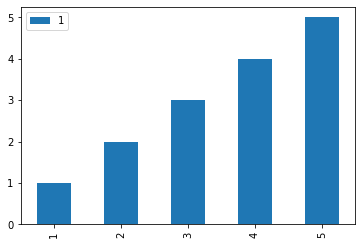

In [38]:
%sql -pb values 1,2,3,4,5

The same data as a pie chart.

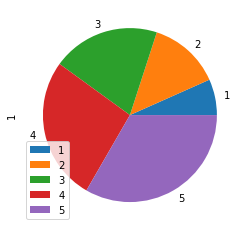

In [39]:
%sql -pp values 1,2,3,4,5

And finally a line chart.

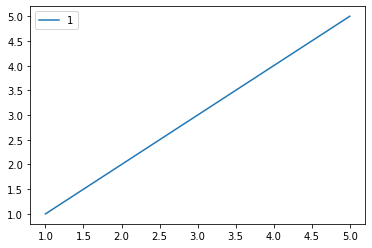

In [40]:
%sql -pl values 1,2,3,4,5

If you retrieve two columns of information, the first column is used for the labels (X axis or pie slices) and 
the second column contains the data. 

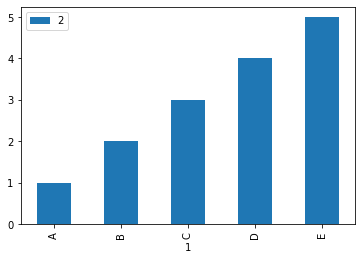

In [41]:
%sql -pb values ('A',1),('B',2),('C',3),('D',4),('E',5)

For a pie chart, the first column is used to label the slices, while the data comes from the second column.

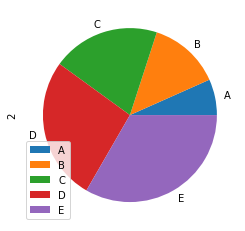

In [42]:
%sql -pp values ('A',1),('B',2),('C',3),('D',4),('E',5)

Finally, for a line chart, the x contains the labels and the y values are used.

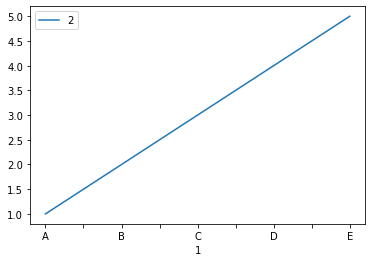

In [43]:
%sql -pl values ('A',1),('B',2),('C',3),('D',4),('E',5)

The following SQL will plot the number of employees per department.

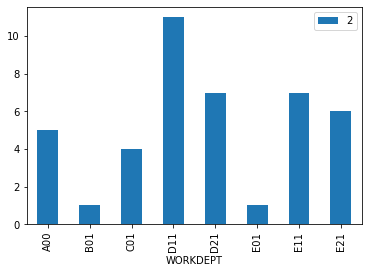

In [44]:
%%sql -pb
SELECT WORKDEPT, COUNT(*) 
  FROM EMPLOYEE
GROUP BY WORKDEPT

## Sample Data
Many of the Db2 notebooks depend on two of the tables that are found in the `SAMPLE` database. Rather than
having to create the entire `SAMPLE` database, this option will create and populate the `EMPLOYEE` and 
`DEPARTMENT` tables in your database. Note that if you already have these tables defined, they will not be dropped.

In [45]:
%sql -sampledata

Sample tables [EMPLOYEE, DEPARTMENT] created.


## Result Sets 
By default, any `%sql` block will return the contents of a result set as a table that is displayed in the notebook. The results are displayed using a feature of pandas dataframes. The following select statement demonstrates a simple result set.

In [46]:
%sql select * from employee fetch first 3 rows only

,EMPNO,FIRSTNME,MIDINIT,LASTNAME,WORKDEPT,PHONENO,HIREDATE,JOB,EDLEVEL,SEX,BIRTHDATE,SALARY,BONUS,COMM
0,000010,CHRISTINE,I,HAAS,A00,3978,1995-01-01,PRES,18,F,1963-08-24,152750.0,1000.0,4220.0
1,000050,JOHN,B,GEYER,E01,6789,1979-08-17,MANAGER,16,M,1955-09-15,80175.0,800.0,3214.0
2,000070,EVA,D,PULASKI,D21,7831,2005-09-30,MANAGER,16,F,2003-05-26,96170.0,700.0,2893.0


You can assign the result set directly to a variable.

In [47]:
x = %sql select * from employee fetch first 3 rows only

The variable x contains the dataframe that was produced by the `%sql` statement so you access the result set by using this variable or display the contents by just referring to it in a command line.

In [48]:
x

,EMPNO,FIRSTNME,MIDINIT,LASTNAME,WORKDEPT,PHONENO,HIREDATE,JOB,EDLEVEL,SEX,BIRTHDATE,SALARY,BONUS,COMM
0,000050,JOHN,B,GEYER,E01,6789,1979-08-17,MANAGER,16,M,1955-09-15,80175.0,800.0,3214.0
1,000060,IRVING,F,STERN,D11,6423,2003-09-14,MANAGER,16,M,1975-07-07,72250.0,500.0,2580.0
2,000100,THEODORE,Q,SPENSER,E21,0972,2000-06-19,MANAGER,14,M,1980-12-18,86150.0,500.0,2092.0


There is an additional way of capturing the data through the use of the `-r` flag.
<pre>
var = %sql -r select * from employee
</pre>
Rather than returning a dataframe result set, this option will produce a list of rows. Each row is a list itself. The column names are found in row zero (0) and the data rows start at 1. To access the first column of the first row, you would use var[1][0] to access it.

In [49]:
rows = %sql -r select * from employee fetch first 3 rows only
print(rows[1][0])

000010


The number of rows in the result set can be determined by using the length function and subtracting one for the header row.

In [50]:
print(len(rows)-1)

3


If you want to iterate over all of the rows and columns, you could use the following Python syntax instead of
creating a for loop that goes from 0 to 41.

In [51]:
for row in rows:
    line = ""
    for col in row:
        line = line + str(col) + ","
    print(line)

EMPNO,FIRSTNME,MIDINIT,LASTNAME,WORKDEPT,PHONENO,HIREDATE,JOB,EDLEVEL,SEX,BIRTHDATE,SALARY,BONUS,COMM,
000010,CHRISTINE,I,HAAS,A00,3978,1995-01-01,PRES    ,18,F,1963-08-24,152750.0,1000.0,4220.0,
000020,MICHAEL,L,THOMPSON,B01,3476,2003-10-10,MANAGER ,18,M,1978-02-02,94250.0,800.0,3300.0,
000030,SALLY,A,KWAN,C01,4738,2005-04-05,MANAGER ,20,F,1971-05-11,98250.0,800.0,3060.0,


If you don't want the header row, modify the first line to start at the first row instead of row zero.

In [52]:
for row in rows[1:]:
    line = ""
    for col in row:
        line = line + str(col) + ","
    print(line)

000010,CHRISTINE,I,HAAS,A00,3978,1995-01-01,PRES    ,18,F,1963-08-24,152750.0,1000.0,4220.0,
000020,MICHAEL,L,THOMPSON,B01,3476,2003-10-10,MANAGER ,18,M,1978-02-02,94250.0,800.0,3300.0,
000030,SALLY,A,KWAN,C01,4738,2005-04-05,MANAGER ,20,F,1971-05-11,98250.0,800.0,3060.0,


Since the data may be returned in different formats (like integers), you should use the str() function to convert the values to strings. Otherwise, the concatenation function used in the above example might fail. For instance, the 9th field is an education level. If you retrieve it as an individual value and try and concatenate a string to it, you get the following error.

In [53]:
try:
    print("Education level="+rows[1][8])
except Exception as err:
    print("Oops... Something went wrong!")
    print(err)

Oops... Something went wrong!
can only concatenate str (not "int") to str


You can fix this problem by adding the str function to convert the date.

In [54]:
print("Education Level="+str(rows[1][8]))

Education Level=18


## Development SQL
The previous set of `%sql` and `%%sql` commands deals with SQL statements and commands that are run in an interactive manner. There is a class of SQL commands that are more suited to a development environment where code is iterated or requires changing input. The commands that are associated with this form of SQL are:
- AUTOCOMMIT
- COMMIT/ROLLBACK
- PREPARE 
- EXECUTE

In addition, the `sqlcode`, `sqlstate` and `sqlerror` fields are populated after every statement so you can use these variables to test for errors.

Autocommit is the default manner in which SQL statements are executed. At the end of the successful completion of a statement, the results are commited to the database. There is no concept of a transaction where multiple DML/DDL statements are considered one transaction. The `AUTOCOMMIT` command allows you to turn autocommit `OFF` or `ON`. This means that the set of SQL commands run after the `AUTOCOMMIT OFF` command are executed are not commited to the database until a `COMMIT` or `ROLLBACK` command is issued.

`COMMIT (WORK)` will finalize all of the transactions (`COMMIT`) to the database and `ROLLBACK` will undo all of the changes. If you issue a `SELECT` statement during the execution of your block, the results will reflect all of your changes. If you `ROLLBACK` the transaction, the changes will be lost.

`PREPARE` is typically used in a situation where you want to repeatidly execute a SQL statement with different variables without incurring the SQL compilation overhead. For instance:
```
x = %sql PREPARE SELECT LASTNAME FROM EMPLOYEE WHERE EMPNO=?
for y in ['000010','000020','000030']:
    %sql execute :x using :y
```
`EXECUTE` is used to execute a previously compiled statement. 

## Db2 CONNECT Statement
As mentioned at the beginning of this notebook, connecting to Db2 is automatically done when you issue your first
`%sql` statement. Usually the program will prompt you with what options you want when connecting to a database. The other option is to use the `CONNECT` statement directly. The `CONNECT` statement is similar to the native Db2
`CONNECT` command, but includes some options that allow you to connect to databases that has not been
catalogued locally.

The `CONNECT` command has the following format:
<pre>
%sql CONNECT TO &lt;database&gt; USER &lt;userid&gt; USING &lt;password | ?&gt; HOST &lt;ip address&gt; PORT &lt;port number&gt; &lt;SSL&gt; 
</pre>
If you use a "?" for the password field, the system will prompt you for a password. This avoids typing the 
password as clear text on the screen. If a connection is not successful, the system will print the error
message associated with the connect request.

If the connection is successful, the parameters are saved on your system and will be used the next time you
run a SQL statement, or when you issue the `%sql CONNECT` command with no parameters.

If you want to force the program to connect to a different database (with prompting), use the `CONNECT RESET` command. The next time you run a SQL statement, the program will prompt you for the  the connection
and will force the program to reconnect the next time a SQL statement is executed.

#### Credits: IBM 2019, George Baklarz [baklarz@ca.ibm.com]